# Data Preprocessing

In [25]:
# Importing Some Python Modules
import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()
# url = 'https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv'
# res = requests.get(url, allow_redirects=True)
# with open('price.csv','wb') as file:
#     file.write(res.content)
# price = pd.read_csv('price.csv')

In [2]:
price = pd.read_csv('price.csv')

In [3]:
price.head(5).transpose()

,0,1,2,3,4
Observation,1,2,3,4,5
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000


Sumber Data: http://byebuyhome.com/
### Objective: menemukan harga rumah yang berada di bawah pasaran.
- Variable:
- Dist_Taxi – distance to nearest taxi stand from the property
- Dist_Market – distance to nearest grocery market from the property
- Dist_Hospital – distance to nearest hospital from the property
- Carpet – carpet area of the property in square feet
- Builtup – built-up area of the property in square feet
- Parking – type of car parking available with the property
- City_Category – categorization of the city based on the size
- Rainfall – annual rainfall in the area where property is located
- House_Price – price at which the property was sold

In [4]:
price.isna().sum()

Observation       0
Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

In [5]:
# Tipe Datanya : DataFrame (df)
print(type(price))
# Ukuran Data
N, P = price.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 936, ', Kolom = ', 10)

In [6]:
# chosen at random
price.sample(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
818,819,4035.0,5870.0,10523.0,1975.0,2368.0,Covered,CAT A,450,8683000
498,499,10452.0,10978.0,16079.0,1836.0,2195.0,Not Provided,CAT C,940,4516000
809,810,11162.0,17227.0,15805.0,1477.0,1798.0,No Parking,CAT C,850,5982000
379,380,7281.0,8521.0,13216.0,1571.0,1877.0,Open,CAT B,580,5467000
395,396,3772.0,6427.0,10119.0,1412.0,1699.0,Open,CAT B,680,3920000
890,891,10396.0,14997.0,15491.0,1214.0,1455.0,Covered,CAT A,950,8722000
774,775,7067.0,10289.0,15577.0,1418.0,1699.0,No Parking,CAT B,870,4916000
160,161,NaN,NaN,13083.0,1544.0,1847.0,Open,CAT B,750,6479000
434,435,5900.0,10980.0,12617.0,1378.0,1670.0,Covered,CAT C,950,5861000
521,522,4068.0,7624.0,6764.0,1207.0,1440.0,No Parking,CAT B,500,4384000


In [7]:
# "Mengintip" beberapa data akhirnya
price.tail(9)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,936,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [8]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties 
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

### Removing a variable(s)

In [9]:
# Drop kolom pertama karena tidak berguna (hanya index)
price.drop("Observation", axis=1, inplace=True)

### Mengoreksi Tipe variabel

In [10]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [11]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

### Removing Duplicate Data

In [12]:
#mengecek apakah ada duplikat data?
print(price.shape)
price.duplicated().sum()

(936, 9)


4

In [13]:
#menghapus entri yang memiliki data duplikat 
price.drop_duplicates(inplace=True)
print(price.duplicated().sum()) # no more duplicates
print(price.shape) # re-check by printing data size

0
(932, 9)


### Variable Selection

In [14]:
# Memilih hanya variable dengan tipe tertentu
price_num = price.select_dtypes(include = ['float64', 'int64'])
price_num.head()
# Perhatikan price_num adalah variable df baru! ... (hati-hati di data yang besar)

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [15]:
# Memilih hanya variable dengan tipe tertentu
price_cat = price.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


Dasar Pengolahan variabel Kategorik: Dummy Variable

In [16]:
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [17]:
df2 = pd.concat([price, df], axis = 1)
df2.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000,0,0,1,0
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000,0,0,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000,1,0,0,0
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000,0,0,1,0


### Memilih Data Secara Manual

In [18]:
# Choosing some columns manually
X = price[['House_Price','Dist_Market']] 
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


### Check Noisy Data & Noisy

Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

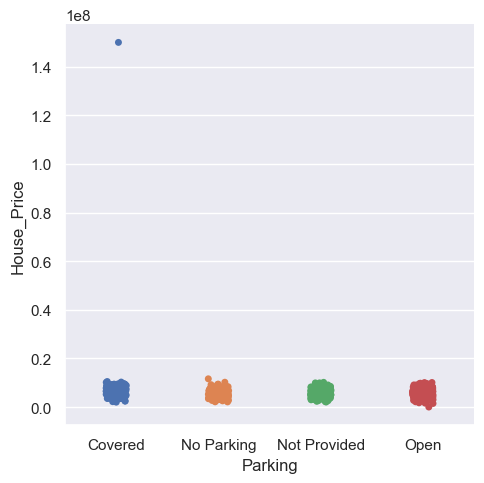

In [19]:
p= sns.catplot(x="Parking", y="House_Price", data=price)
# Apa yang bisa dilihat dari hasil ini?


### Outlier atau noise? How to decide?
- Univariate Outlier removal
- Perlu asumsi "distribusi" dari datanya

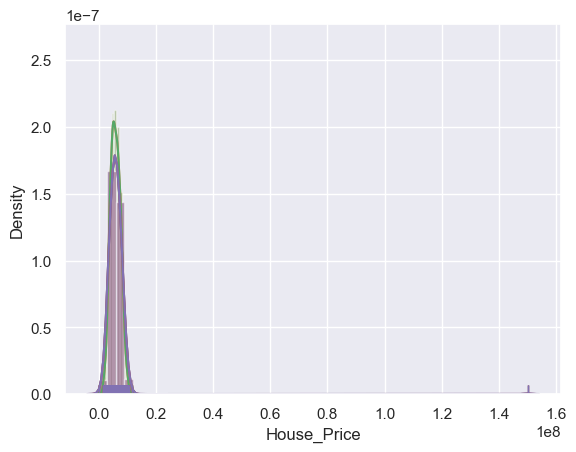

In [27]:
# Distributions
p1 = sns.distplot(price['House_Price'], kde=True, rug=True)
plt.show()

In [21]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel "harga"

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [22]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)

(931, 9) (932, 9)


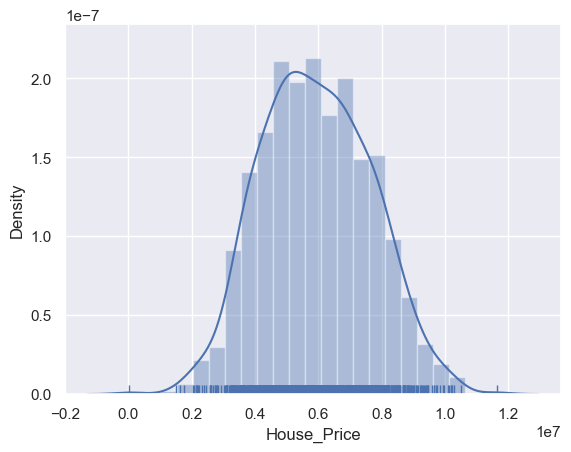

In [28]:
# Distributions
p2 = sns.distplot(price2['House_Price'], kde=True, rug=True)
plt.show()

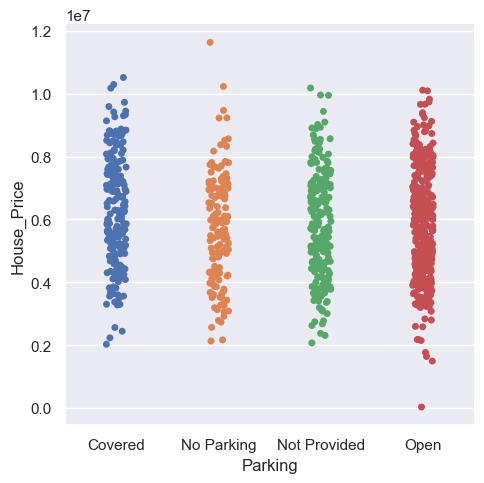

In [33]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)
plt.show()
# Apa yang bisa dilihat dari hasil ini?
# Harga rumah tidak mempengaruhi jenis tempat parkir

### Missing Values

In [34]:
# General Look at the Missing Values
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [35]:
set(price2['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

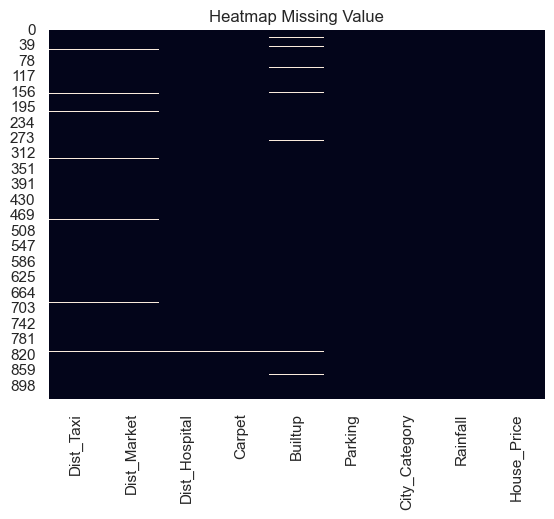

In [36]:
# Gambaran yang Lebih baik tentang MV terutama di Big Data
sns.heatmap(price2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [37]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')

,persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [38]:
# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

In [39]:
print(price2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


### Statistika Deskriptif

In [40]:
price2.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,970.000000,7.183000e+06
max,16850.000000,18281.000000,22407.000000,2229.000000,2667.000000,1560.000000,1.163200e+07


In [41]:
# Statistika Sederhana dari data "Numerik"-nya
price2.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897,897,897.000000,8.970000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,353,347,NaN,NaN
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,NaN,NaN,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,NaN,NaN,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,NaN,NaN,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,NaN,NaN,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,NaN,NaN,970.000000,7.183000e+06


In [42]:
# ini adalah parameter tambahan jika kita juga ingin mendapatkan statistik sederhana seluruh datanya
# (termasuk data kategorik)
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,919.000000,932
unique,NaN,4
top,NaN,Open
freq,NaN,372
mean,8229.727965,NaN
std,2561.985008,NaN
min,146.000000,NaN
25%,6476.000000,NaN
50%,8230.000000,NaN
75%,9937.000000,NaN


### Distribusi nilai pada setiap variabel kategorik

In [43]:
# get all unique values of a variable/column
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'Open', 'No Parking', 'Covered', 'Not Provided'}
City_Category :  {'CAT A', 'CAT B', 'CAT C'}


In [44]:
price['Parking'].unique()

['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [45]:
# price
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = price.select_dtypes(include = ['float64', 'int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [47]:
# Distribusi tiap data
price['Parking'].value_counts()
# kita bisa juga visualisasikan informasi ini

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking, dtype: int64

### Kick-off event EU SocioDigithon 2023

In [48]:
CT = pd.crosstab(index=price2["City_Category"], columns=price2["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,72,50,80,115
CAT B,59,51,88,149
CAT C,49,40,55,89


#### Data Grouping

In [49]:
# Slicing DataFrame - Just like query in SQL
price2[price2["City_Category"] == "CAT B"].describe()
# Bisa ditambahkan .drop("Parking", axis=1) untuk menghilangkan kolom dengan single value

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02
mean,8079.703170,10693.945245,12855.314121,1500.380403,1799.806916,780.259366,5.520006e+06
std,2475.693863,2534.441833,2588.293527,252.359775,301.620757,260.422493,1.324843e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6400.500000,8891.000000,11088.500000,1317.000000,1577.500000,590.000000,4.613500e+06
50%,7998.000000,10711.000000,12950.000000,1487.000000,1787.000000,770.000000,5.438000e+06
75%,9794.000000,12535.000000,14685.000000,1688.000000,2023.500000,950.000000,6.369000e+06
max,15082.000000,17101.000000,19617.000000,2214.000000,2647.000000,1560.000000,9.661000e+06


### Saving (preprocessed) Data

In [51]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("D:\DATA_ANALYST\Investasi_properti/price_PreProcessed.csv", encoding='utf8')